<a href="https://colab.research.google.com/github/KenzaxTazi/Agri-Risk/blob/master/Final_plots_Raghul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Analysis
This Notebook contains a method that takes two columns of a pandas dataframe, (a prediction, and a truth column) and plots them against eachother, as well as the residual error to analyze the results.

This method is highly specialised to working with the crop detailed data in this project, since there is a lot of fiddling to get the visuals right.

In [0]:
import pandas as pd
import xarray as xr
import numpy as np
import os, sys
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import string
import pandas as pd
from sklearn.linear_model import LinearRegression as lin_reg

In [ ]:
# Read in our dataset
data = pd.read_csv('data.csv')
prediction_column = 'prediction'
truth_column = 'maize_a_2010'
data_scale = 1000 # This parameter is a bit of dark art to estimate, but essentially it represents a useful
                  # subscale of the data to look at the results over. For maize, this is about 1000.

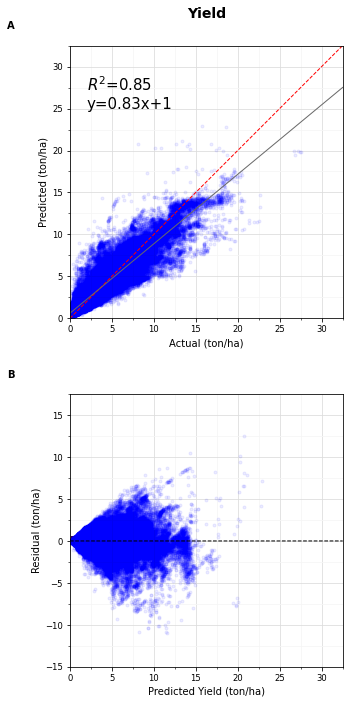

In [15]:
def plot_predictions_and_residual(data, prediction_column, truth_column, data_scale=data_scale):
    plt.style.use('seaborn-pastel')
    fig, ax = plt.subplots(2,1, figsize=(10,10), gridspec_kw={'width_ratios': [1]})
    
    #########################

    test_set_y = test_set_0[[truth_column]]/data_scale
    test_x_predict = test_set_0[[prediction_column]]/data_scale
    test_x_predict
    r2 = round(r2_score(test_set_y[truth_column], test_x_predict[prediction_column]), 2)

    max_x = test_set_y[truth_column].max()
    max_y = max(test_x_predict[prediction_column])

    max_axis = max(max_x, max_y) + data_scale #adds a bit to the max axis so that we can see the max point easily

    min_x = test_set_y[truth_column].min()
    min_y = min(test_x_predict[prediction_column])

    min_axis = min(min_x, min_y) - data_scale
    #equation of line for prediction vs real values

    major_ticks = np.arange(0, 35, 5)
    minor_ticks = np.arange(0, 35, 2.5)
    model = lin_reg(fit_intercept=True)
    model.fit(X=test_set_y, y=test_x_predict)

    intercept = model.intercept_
    gradient = model.coef_

    intercept_round = int(round(intercept[0],0))
    gradient_round = round(gradient[0][0],2)

    residual = test_x_predict[prediction_column]-test_set_y[truth_column]

    max_residual = residual.max()
    min_residual = residual.min()

    ax[0].set_xlim([0,30])
    ax[0].set_xticks(major_ticks)
    ax[0].set_xticks(minor_ticks, minor=True)
    ax[0].set_ylim([0,30])
    ax[0].set_yticks(major_ticks)
    ax[0].set_yticks(minor_ticks, minor=True)
    ax[0].set_yticklabels(major_ticks)
    ax[0].grid(which='minor', color='whitesmoke')
    ax[0].grid(which='major', color='gainsboro')
    ax[0].set_axisbelow
    ax[0].tick_params(labelsize=8.5)
    ax[0].set_aspect('equal', 'box')
    ax[0].scatter(x=test_set_y, y=test_x_predict, alpha=0.07, c='b', marker=".")
    ax[0].plot(np.arange(-5,40,0.01),np.arange(-5,40,0.01),linewidth=1, linestyle='dashed', c='r') #1:1 line
    ax[0].set_axisbelow(True)

    #specify linear regression line (line through predictions vs truth)

    x = np.arange(-5,40,0.01)
    y = gradient*x + intercept
    ax[0].plot(x.reshape(1,-1)[0],y.reshape(1,-1)[0],linewidth=1, c='dimgrey') 


    ax[0].set(xlabel= 'Actual (ton/ha)', ylabel = 'Predicted (ton/ha)')
    ax[0].text(x=2, y=25, s=f'$R^2$={r2}\ny={gradient_round}x+{intercept_round}', ma = 'left', size=15)

    ####################################################################
    ##Plot for Residuals##

    major_ticks_2 = np.arange(-15, 20, 5)
    minor_ticks_2 = np.arange(-15, 20, 2.5)

    ax[1].set_xlim([0,30])
    ax[1].set_xticks(major_ticks)
    ax[1].set_xticks(minor_ticks, minor=True)
    ax[1].set_ylim([-15,15])
    ax[1].set_yticks(major_ticks_2)
    ax[1].set_yticks(minor_ticks_2, minor=True)
    ax[1].grid(which='minor', color='whitesmoke')
    ax[1].grid(which='major', color='gainsboro')
    ax[1].set_axisbelow
    ax[1].tick_params(labelsize=8.5)
    ax[1].scatter(x=test_x_predict, y=residual, alpha=0.07, c='b', marker=".")
    ax[1].plot(np.arange(0,max_axis,0.01),np.linspace(0,0,len(np.arange(0,max_axis,0.01))),linewidth=1, linestyle='dashed', c='k') 
    ax[1].set_axisbelow(True)
    ax[1].set(xlabel= 'Predicted Yield (ton/ha)', ylabel = 'Residual (ton/ha)')

    ###########################################################################
    plt.suptitle('Yield', fontsize=14, fontweight='bold', x=0.5, y=0.99)
    ax = ax.flat
    for n, axis in enumerate(ax):
      axis.imshow(np.random.randn(1,1), interpolation='none')    
      axis.text(-0.23, 1.06, string.ascii_uppercase[n], transform=axis.transAxes, 
              size=10, weight='bold')
    fig.tight_layout(pad=2.3)
    ########
    plt.savefig('final_plot.png', bbox_inches='tight')

    plt.show()
    
plot_predictions_and_residual(data, 'prediction', 'maize_a_2010')